## Building & Evaluation of a model using the MNIST dataset to recognize 4digits handwritten numbers and also testing it with real-world data of image of 4 digits  ##

# Main Objective:
The main objective is to build a model that recognizes the sequences of four digits from images. 
Now I am going to build model of a hand writing recognizer of 4-digit numbers using the example provided of single digit recognizer of MNIST data.

### Data Preparation
Load the MNIST Dataset


In [35]:
#Dataset Loading
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


Data Augmentation (Creating 4-Digit Sequences)

Since MNIST contains only single digits, we need to create a new dataset where each example consists of 4 consecutive digits. This involves concatenating four single digit images horizontally and adjusting the labels accordingly.

Create Multi-Digit Images

Generate new training and testing data by stitching single-digit images into sequences of four digits.

In [36]:
import numpy as np

def create_four_digit_images(images, labels):
    # Select random indices to create 4-digit combinations
    indices = np.random.randint(len(images), size=(len(images) // 4, 4))
    new_images = np.array([np.hstack(images[idx]) for idx in indices])
    new_labels = np.array([labels[idx] for idx in indices])
    return new_images, new_labels

train_images_4d, train_labels_4d = create_four_digit_images(train_images, train_labels)
test_images_4d, test_labels_4d = create_four_digit_images(test_images, test_labels)


Normalize and Reshaping the Data

Normalize the images and reshaping them to fit the input requirements of a convolutional neural network.

In [37]:
train_images_4d = train_images_4d / 255.0
test_images_4d = test_images_4d / 255.0

# Reshape for convolutional network (28, 112, 1)
train_images_4d = train_images_4d.reshape((-1, 28, 112, 1))
test_images_4d = test_images_4d.reshape((-1, 28, 112, 1))


One-Hot Encode the Labels
using TensorFlow's to_categorical function to convert each digit in the sequence into a one-hot vector.

In [38]:
from tensorflow.keras.utils import to_categorical

def convert_labels_to_one_hot(labels, num_classes=10):
    # labels should be an array of shape (num_samples, 4), where each entry is an integer from 0 to 9
    one_hot_labels = np.zeros((labels.shape[0], 4, num_classes))
    for i in range(4):  # Assuming each image has exactly 4 digits
        one_hot_labels[:, i, :] = to_categorical(labels[:, i], num_classes=num_classes)
    return one_hot_labels

# Convert training and testing labels
train_labels_4d_one_hot = convert_labels_to_one_hot(train_labels_4d)
test_labels_4d_one_hot = convert_labels_to_one_hot(test_labels_4d)

# Model Building
Defining the Model Architecture

Construct a convolutional neural network that can process 4-digit images and output four sets of predictions.
 Design the Neural Network Architecture
Model Type
Choosing Convolutional Neural Networks (CNNs), depending on the complexity of the task.
A typical CNN for this task it includes convolutional layers, activation layers (like ReLU), pooling layers, and fully connected layers at the end.



In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Reshape

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 112, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(40, activation='softmax')
])

# Reshape output to 4 sets of 10 (4 digits)
model.add(Reshape((4, 10)))


Compiling the Model

Specifying the optimizer, loss function, and metrics. For multi-class classification, categorical_crossentropy is common.

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [52]:
#Fit the model on the training data.
model.fit(train_images_4d, train_labels_4d_one_hot, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8270 - loss: 0.4643 - val_accuracy: 0.9710 - val_loss: 0.1078
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8310 - loss: 0.4418 - val_accuracy: 0.9735 - val_loss: 0.1049
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8355 - loss: 0.4292 - val_accuracy: 0.9690 - val_loss: 0.1049
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8416 - loss: 0.4068 - val_accuracy: 0.9730 - val_loss: 0.0952
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8501 - loss: 0.3873 - val_accuracy: 0.9743 - val_loss: 0.0958
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8521 - loss: 0.3768 - val_accuracy: 0.9738 - val_loss: 0.0934
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8573 - loss: 0.3645 - val_accuracy: 0.9728 - val_loss: 0.0960
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8597 - loss: 0.3534 - 

## Evaluate the Model

Test the model's performance on unseen data.

In [53]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_4d, test_labels_4d_one_hot)
print(f"Test accuracy: {test_acc}")

# Get predictions and convert them back to digit labels for interpretation
predictions = model.predict(test_images_4d)
predicted_labels = np.argmax(predictions, axis=-1)  # Convert from one-hot back to integer labels


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9751 - loss: 0.0858
Test accuracy: 0.9739000201225281
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


we got a  test accuracy of approximately 97%.

In [54]:
predicted_labels 

array([[3, 4, 4, 0],
       [7, 5, 6, 5],
       [1, 3, 9, 5],
       ...,
       [8, 1, 1, 3],
       [6, 9, 2, 9],
       [5, 4, 2, 0]])

### Visualize Predictions

Visualize some predictions to manually check how well the model is performing.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


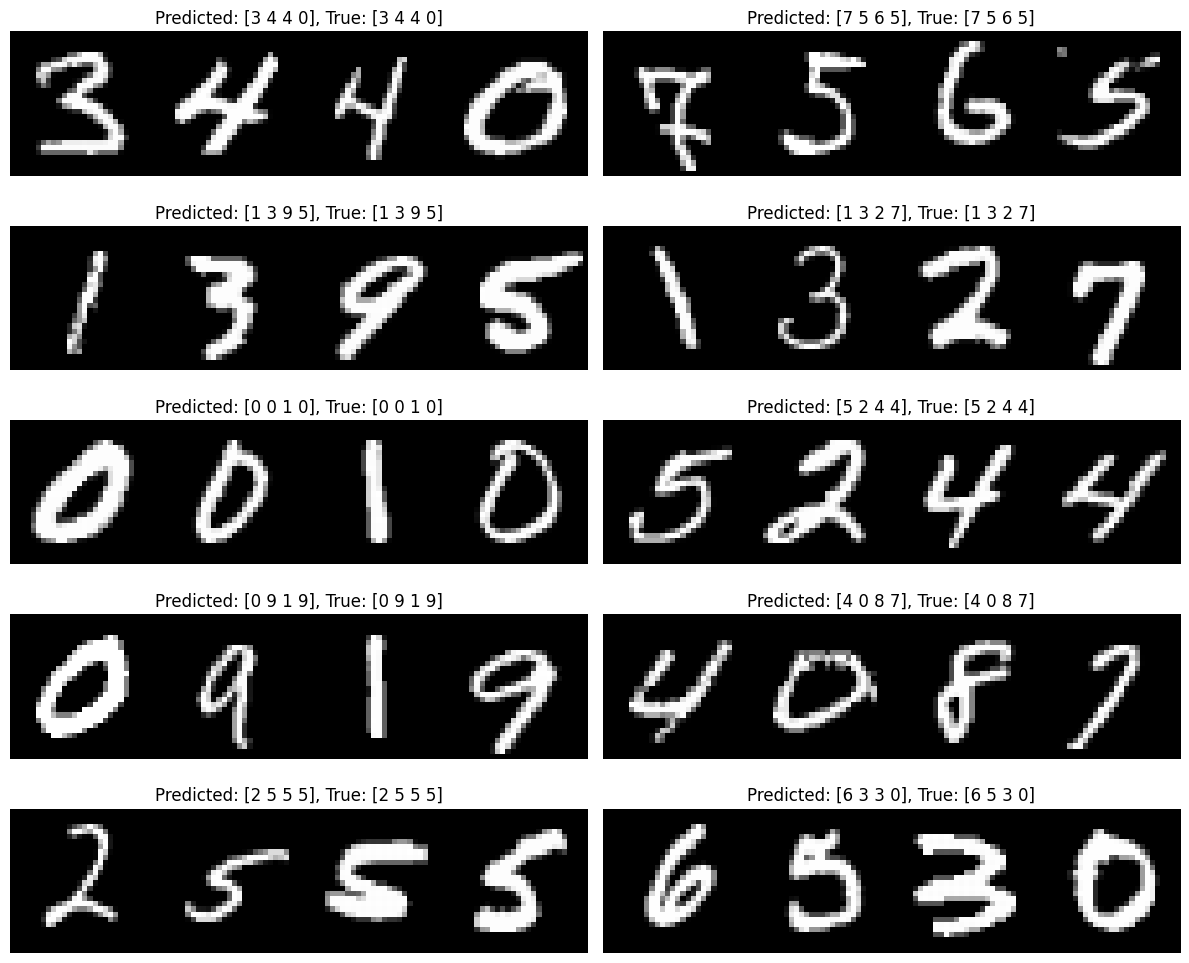

In [55]:
import matplotlib.pyplot as plt

def plot_images(images, labels, predictions):
    plt.figure(figsize=(12, 10))
    for i in range(10):
        plt.subplot(5, 2, i+1)
        plt.imshow(images[i].reshape(28, 112), cmap='gray')
        plt.title(f"Predicted: {predictions[i]}, True: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

predictions = model.predict(test_images_4d[:10])
predicted_labels = np.argmax(predictions, axis=-1)
plot_images(test_images_4d[:10], test_labels_4d[:10], predicted_labels)


Now our model is ready to test with the real world data
I have a hand written number of 5078 I am going to test the model using the hand written number.
For that first we need to preprocess the data.
Load and Preprocess the Image

Now lets load the image, convert it to grayscale, resize it to the dimensions expected by our model, normalize the pixel values, and possibly invert the colors if the image's background and digit colors differ from the MNIST dataset .
1.Load the Image

First, let's load the image and convert it to the appropriate format. We will use OpenCV for this task.

2. Preprocess the Image

The preprocessing will involve converting to grayscale, resizing, and normalizing the image.

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the image
image_path = '/Users/rameshchidurala/Documents/DSC-550 Activities/IMG_6014.jpg'
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Invert the image if necessary 
gray_image = 255 - gray_image

# Resize the image to 28x112 (since we are dealing with 4 digits)
resized_image = cv2.resize(gray_image, (112, 28))

# Normalize the image
normalized_image = resized_image / 255.0

# Reshape for the model (1, 28, 112, 1)
final_image = np.reshape(normalized_image, (1, 28, 112, 1))


# Predicting using the model
predictions = model.predict(final_image)
predicted_labels = np.argmax(predictions, axis=-1)  # Convert softmax outputs to label indices

predicted_labels


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[5, 0, 7, 5]])

To test the model above i used the preprocessed image to test the model and to make predictions and we got the results 5,0,7,5 . It predicted right first three numbers  5,0,7 and predicted on e number wrong instead of 8 it predicted 5. 
simce our accuracy of the model is 87% it make sense of making one mistake. 
For better predictions we can run more epochs also increse the layers in the Cnn Model 
Overall our model perfoeming well.

# Visualizing the results

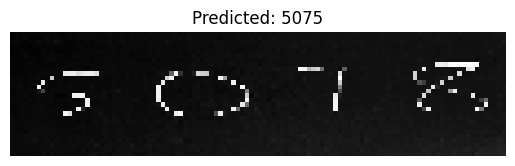

In [57]:
# Combine predicted digits into a single string
predicted_digits = ''.join(str(digit) for digit in predicted_labels[0])

# Display the processed image
plt.imshow(resized_image, cmap='gray')  # Show the resized image to match the prediction scale
plt.title(f"Predicted: {predicted_digits}")
plt.axis('off')
plt.show()